### Notebook 2

Hello 4604 and 5604. Welcome to week two! 

In this notebook we will:

1. Get practice using and interpreting K-nearest neighbors
2. Learn how to tune a hyperparameter, which is an important skill for machine learning practitioners
3. Gain exposure to the scikit-learn API. Scikit-learn is a common toolkit for machine learning in Python

In [1]:
# To get started, please import the latest versions of numpy, pandas and sklearn
# You will also need to install and load matplotlib, a common Python plotting library

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# configure matplotlib to show plots in the notebook itself
%matplotlib inline 

### Data

In this notebook, we will be using the [Pima Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The data consists of patient records with a number of features, along with a binary label indicating if the patient has diabetes or does not have diabetes. Note that "all patients here are females at least 21 years old of Pima Indian heritage." Note that the `outcome` variable records if a patient does or does not have diabetes.

In [2]:
df = pd.read_csv('diabetes.csv') #Load the dataset

features = df.drop('Outcome', axis=1) # separate out the features variables
labels = df["Outcome"]    # print out the dataset and take a look at the data

# Print out the features. 

print(list(features.columns))

# How many features are there in the dataset? 

# There are eight features in the dataset

# How many dimensions are there in the dataset? 

# There are eight dimensions in the dataset.

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [3]:
# Let's go ahead and start with a two-dimensional dataset to build intuitions
low_dim = features[['Glucose', 'BloodPressure']]

Text(0, 0.5, 'Blood Pressure')

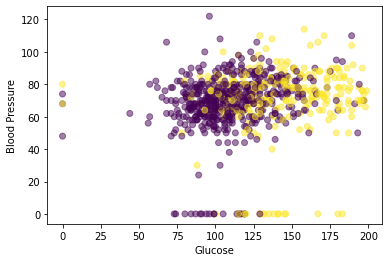

In [4]:
# Plot Glucose and BloodPressure in two dimensions, with Glucose along the x-axis and BloodPressure along the y-axis
# In your plot, use color to indicate if a patient has diabetes or does not have diabetes 

x = low_dim["Glucose"]
y = low_dim["BloodPressure"]
colors = labels
plt.scatter(x, y, c = colors, alpha=0.5)
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")

# hint: Use matplotlib's scatter function
# https://matplotlib.org/3.3.1/gallery/shapes_and_collections/scatter.html

**Question**

Based on your plot, do you think that kNN would do a good job identifying if a patient has diabetes based on their Glucose and BloodPressure? Please briefly explain your reasoning?

Yes, because the observations with diabetes seem to be clustered near each other and the observations w/o diabetes are also clustered together.

**Question**

Describe a point on your plot where you think kNN would **incorrectly** classify a patient as having or not having diabetes (to answer, assume k=2). Explain why you think KNN would have a difficult time making such a classification 

(Note: you don't have to perfectly describe the location of a single point on the plot, just describe your intution about why some point might be misclassified. For instance, you might say that "Along the top of the plot there is a point that kNN might misclassify because ...")

Someone with a blood pressure of 70 and a glucose level of 115 would be difficult to classify because at that point in the graph the diabetes and non-diabetes observations are mixed together.

## Hello, sklearn! 

The next cell shows you how to call a classifier from the scikit-learn API. The scikit-learn library does a good job maintaining consitent APIs for all of its classifiers. So you will see this pattern again and again when using the library this semester. Here it is.

In [5]:
from sklearn.neighbors import KNeighborsClassifier   # import the classifier

knn = KNeighborsClassifier(n_neighbors=2)  # Instantiate the classifier object

knn.fit(low_dim, labels)   # Fit the classifier 

knn.score(low_dim, labels)   # Report the accuracy of the classifier
                             # The accuracy of a classifier is simply what fraction of the data it labels correctly

0.81640625

**Question**

Based on your scatter plot, does it make sense that the accuracy is 81.6%? Does the number seem high or low or appropriate to you? Explain your reasoning.

No, the accuracy seems a bit high since there are no obvious clusters from looking at the scatterplot. The diabetes patients seem to contained to the left side of the plot and the non-diabetes patients on the right.

## Hello, tuning! 

A **hyperparameter** is a parameter set by the practitoner, instead of learned from data. It's called a hyperparameter because machine learning models also have **parameters** which are learned from data (rather than set by hand). In a week or so, you will have a better sense of what it means to _learn_ a parameter from data. For now, it's enough to say that $k$ is a hyperparameter for k-nearest neighbors. $k$ is a hyperparameter because the practitioner decides if we should set a label based on if $k=1$ or $k=10$. 

In machine learning, choosing the value of a hyperparameter is called "tuning". It's fun to sit there picking values of hyperparmaters and observing what happens. But it's much better to be systematic in how you choose a hyperparameter. One common strategy is called **grid search**. The idea behind [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is to check how a model performs by taking even steps across a range of values. Other strategies include [random search](https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf) and [Bayesian optimization](https://distill.pub/2020/bayesian-optimization/). In general, it's OK to stick to simpler strategies like grid search for hyperparamter tuning when you are starting out.

The next cell shows how to perform a grid search over different possible values of $k$. Please read over the code and take a moment to understand what it is doing.

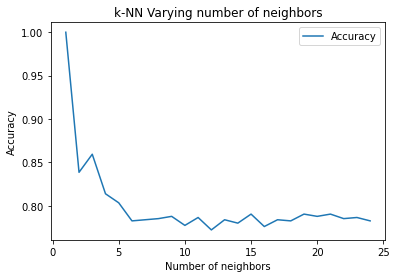

In [6]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,25)
accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(features, labels)
    
    #Compute accuracy
    accuracy[i] = knn.score(features, labels)
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, accuracy, label='Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**Question**

Why is accuracy 100% when K=1? 

The closest neighbor to a point is the point itself which means that kNN will always classify the point correctly when k = 1. 

Based on your plot, why do you think accuracy decreases as $k$ gets larger? 

As k increases, the algorithm is considering more neighbors which may be geometrically far from the observation in question. This could lead to inaccuracy in predicting the classifier.

In [7]:
## What happens if we set K to the number of labels in the dataset?

N = labels.size

knn = KNeighborsClassifier(n_neighbors=N)

knn.fit(low_dim, labels)

# Count up how many times there are 0s and 1s in the dataset
values, counts = np.unique(labels, return_counts=True)
total_zeros = counts[0]
total_ones = counts[1]

print(total_zeros / labels.size)
print(knn.score(low_dim, labels))

0.6510416666666666
0.6510416666666666


**Question**

The previous cell shows the accuracy of kNN when $k = N$, where $N$ is the total number of instances in the dataset. What do you observe? Why do you think that is the case?  

The accuracy is equal to the proportion of zeroes in the dataset because when k = the total number of instances, all points are simply classified as which ever class has the most observations.

### Plotting a decision boundry 

Decision boundaries divide up feature space. Points in certain regions of the feature space are assigned to one class, and points in other regions of the feature space are assigned to another class. Use the variable `k` in the code below to vary $k$. What happens to the plot of the decision boundry as $K$ gets larger? Why do you think that is? 

The decision boundary becomes less precise because as k increases, the accuracy of kNN decreases.

Text(0.5, 1.0, '2-Class classification (k = 50)')

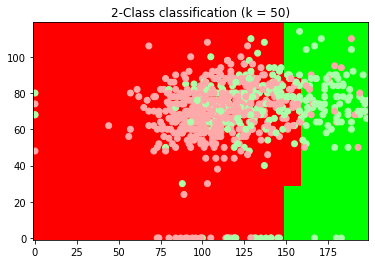

In [22]:
from matplotlib.colors import ListedColormap

k = 50


#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=k)

#Fit the model
knn.fit(features[['Glucose', 'BloodPressure']], labels)

knn.score(features[['Glucose', 'BloodPressure']], labels)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])

cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

X = features[['Glucose', 'BloodPressure']].to_numpy()
y = labels

h = 10  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_bold)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_light)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (k))


### Hello, eight dimensions!

Last week, we spent a lot of time building up intuition for the distances between 2-D data points in space. This week, we learned the definition of [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance), which formalizes our intuitions about straight-line distance in 2D in a way that extends to an arbirary number of dimensions. Notice that we can use the same KNN algorithm we used in 2D to reason about 8-dimensional data. 

In [23]:
print(features.shape)  # we have 8-D data

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(features, labels)

knn.score(features, labels)

(768, 8)


0.859375